Reviewer 1

100 coil

80 arcene basehock gisette

60 pcmac relathe

300 isolet

In [ ]:
import numpy as np
import pandas as pd

datasets = ['arcene', 'basehock', 'coil', 'gisette', 'isolet', 'pcmac', 'relathe']
# datasets = ['coil', 'gisette', 'isolet', 'pcmac', 'relathe']
total_epoch = 80

_acc = np.zeros(5)

for dataset in datasets:

    for seed in range(5):

        result = pd.read_csv('Response/Review1/Half_initialized/{}_{}.csv'.format(dataset, seed))

        test_acc = result['test_acc'].to_numpy()

        _acc[seed] = (np.mean(test_acc[total_epoch-5:total_epoch]))

    print('This is {} dataset'.format(dataset))

    print(_acc.tolist())

    print(np.mean(_acc))
    print(np.sqrt(np.var(_acc)))
    print('*' * 50)

Test_Acc with different ratios of GINI initialized clients

In [69]:
import pandas as pd

dataset = 'isolet'

def get_test_acc(dataset, proportion):
    for seed in range(5):

        if proportion == 'half':
            result = pd.read_csv('Response/Review1/Half_initialized/{}_{}.csv'.format(dataset, seed))
        elif proportion == 'all':
            result = pd.read_csv('Response/Review1/All_initialized/{}_{}.csv'.format(dataset, seed))
        else:
            result = pd.read_csv('Response/Review1/Partially_initialized/{}_{}_{}.csv'.format(dataset, int(100 * proportion), seed))

        if seed == 0:
            train_acc = result['train_acc'].to_numpy()
            test_acc = result['test_acc'].to_numpy()
        else:
            train_acc += result['train_acc'].to_numpy()
            test_acc += result['test_acc'].to_numpy() 

    train_acc /= 5
    test_acc /= 5

    return train_acc, test_acc



In [70]:
_, test_acc_10 = get_test_acc(dataset=dataset, proportion=0.9)
_, test_acc_30 = get_test_acc(dataset=dataset, proportion=0.7)
_, test_acc_70 = get_test_acc(dataset=dataset, proportion=0.3)
_, test_acc_90 = get_test_acc(dataset=dataset, proportion=0.1)
_, test_acc_50 = get_test_acc(dataset=dataset, proportion='half')
_, test_acc_100 = get_test_acc(dataset=dataset, proportion='all')



In [ ]:
import numpy as np
from matplotlib import pyplot as plt

total_epoch = 300
end = total_epoch - 10 + 1

def moving_average(x):
    w = 10
    x = np.array(x).flatten()
    return np.convolve(x, np.ones(w), 'valid') / w


def plot_moving_acc(test_acc_10, test_acc_30, test_acc_50, test_acc_70, test_acc_90, test_acc_100):
    x = np.arange(total_epoch)
    plt.figure(1)
    plt.plot(x[:end], moving_average(test_acc_10), label='0.1')
    plt.plot(x[:end], moving_average(test_acc_30), label='0.3')
    plt.plot(x[:end], moving_average(test_acc_50), label='0.5')
    plt.plot(x[:end], moving_average(test_acc_70), label='0.7')
    plt.plot(x[:end], moving_average(test_acc_90), label='0.9')
    plt.plot(x[:end], moving_average(test_acc_100), label='1.0')

    plt.xlabel('epoch')
    plt.ylabel('Test Acc')
    plt.title('Test Acc of isolet dataset with different ratios')
    plt.legend()
    plt.show()

    plt.close()


def plot_acc(test_acc_10, test_acc_30, test_acc_50, test_acc_70, test_acc_90, test_acc_100):
    x = np.arange(total_epoch)
    plt.figure(1)
    plt.plot(x, (test_acc_10), label='0.1')
    plt.plot(x, (test_acc_30), label='0.3')
    plt.plot(x, (test_acc_50), label='0.5')
    plt.plot(x, (test_acc_70), label='0.7')
    plt.plot(x, (test_acc_90), label='0.9')
    plt.plot(x, (test_acc_100), label='1.0')

    plt.xlabel('epoch')
    plt.ylabel('Test Acc')
    plt.title('Test Acc of isolet dataset with different ratios')
    plt.legend()
    plt.show()

    plt.close()


In [ ]:
plot_moving_acc(test_acc_10, test_acc_30, test_acc_50, test_acc_70, test_acc_90, test_acc_100)
plot_acc(test_acc_10, test_acc_30, test_acc_50, test_acc_70, test_acc_90, test_acc_100)

Num_feat with different ratios of GINI initialized clients

In [ ]:
import pandas as pd

dataset = 'basehock'

def get_num_feats(dataset, proportion):
    for seed in range(5):

        if proportion == 'half':
            result = pd.read_csv('Response/Review1/Half_initialized/{}_{}.csv'.format(dataset, seed))
        elif proportion == 'all':
            result = pd.read_csv('Response/Review1/All_initialized/{}_{}.csv'.format(dataset, seed))
        else:
            result = pd.read_csv('Response/Review1/Partially_initialized/{}_{}_{}.csv'.format(dataset, int(100 * proportion), seed))

        if seed == 0:
            num_feats = result['num_feats'].to_numpy()
            num_emb = result['num_emb'].to_numpy()
        else:
            num_feats += result['num_feats'].to_numpy()
            num_emb += result['num_emb'].to_numpy() 

    num_feats = num_feats / 5.0
    num_emb = num_emb / 5.0

    return num_feats, num_emb



In [ ]:
num_feats_10, _ = get_num_feats(dataset=dataset, proportion=0.9)
num_feats_30, _ = get_num_feats(dataset=dataset, proportion=0.7)
num_feats_70, _ = get_num_feats(dataset=dataset, proportion=0.3)
num_feats_90, _ = get_num_feats(dataset=dataset, proportion=0.1)
num_feats_50, _ = get_num_feats(dataset=dataset, proportion='half')
num_feats_100, _ = get_num_feats(dataset=dataset, proportion='all')



In [ ]:
import numpy as np
from matplotlib import pyplot as plt

total_epoch = 80

def plot_acc(num_feats_10, num_feats_30, num_feats_50, num_feats_70, num_feats_90, num_feats_100):
    x = np.arange(total_epoch)
    plt.figure(1)
    plt.plot(x, (num_feats_10), label='0.1')
    plt.plot(x, (num_feats_30), label='0.3')
    plt.plot(x, (num_feats_50), label='0.5')
    plt.plot(x, (num_feats_70), label='0.7')
    plt.plot(x, (num_feats_90), label='0.9')
    plt.plot(x, (num_feats_100), label='1.0')

    plt.xlabel('epoch')
    plt.ylabel('Number of Selected Features')
    plt.title('Number of Selected Features of basehock dataset with different ratios')
    plt.legend()
    plt.show()

    plt.close()


In [ ]:
plot_acc(num_feats_10, num_feats_30, num_feats_50, num_feats_70, num_feats_90, num_feats_100)

Communication Cost w/o Paillier

In [ ]:
import pickle

import torch

non_zero_embedding = torch.randn(11200)

plain_output = open('11200.pickle','wb')
pickle.dump(non_zero_embedding, plain_output)
plain_output.close()


Lasso

In [67]:
import pandas as pd

dataset = 'isolet'

def get_lasso_test_acc(dataset):
    for seed in range(5):
        result = pd.read_csv('Response/Review1/Lasso/{}_{}.csv'.format(dataset, seed))

        if seed == 0:
            train_acc = result['train_acc'].to_numpy()
            test_acc = result['test_acc'].to_numpy()
        else:
            train_acc += result['train_acc'].to_numpy()
            test_acc += result['test_acc'].to_numpy() 

    train_acc /= 5
    test_acc /= 5

    return train_acc, test_acc


In [68]:
_, lasso_test_acc = get_lasso_test_acc(dataset=dataset)

In [72]:
import numpy as np
from matplotlib import pyplot as plt

total_epoch = 300
end = total_epoch - 10 + 1

def moving_average(x):
    w = 10
    x = np.array(x).flatten()
    return np.convolve(x, np.ones(w), 'valid') / w


def plot_moving_acc_init(lasso_test_acc, gini_test_acc):
    x = np.arange(total_epoch)
    plt.figure(1)
    plt.plot(x[:end], moving_average(lasso_test_acc), label='lasso')
    plt.plot(x[:end], moving_average(gini_test_acc), label='gini')

    plt.xlabel('epoch')
    plt.ylabel('Test Acc')
    plt.title('Test Acc of isolet dataset with different initialization methods')
    plt.legend()
    plt.show()

    plt.close()



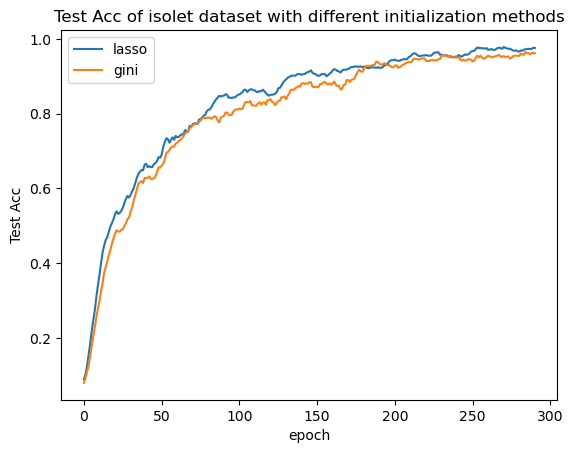

In [73]:
plot_moving_acc_init(lasso_test_acc=lasso_test_acc, gini_test_acc=test_acc_100)

Reviewer 2

In [ ]:
import numpy as np
import pandas as pd

dataset = 'basehock'
total_epoch = 80

_acc = np.zeros(5)

for seed in range(5):

    result = pd.read_csv('Response/Review2/{}_100clients_{}.csv'.format(dataset, seed))

    test_acc = result['test_acc'].to_numpy()

    _acc[seed] = (np.mean(test_acc[total_epoch-5:total_epoch]))

print(_acc.tolist())

print(np.mean(_acc))
print(np.sqrt(np.var(_acc)))

Reviewer 3

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve

def _plot_roc(label, y_prob, file_dir):
    fpr, tpr, thresholds_roc = roc_curve(label, y_prob)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(fpr, tpr, ls="-", linewidth=2.0)
    ax.grid(True, linestyle="-.")
    ax.set_xlabel("false positive rate", labelpad=5, loc="center")
    ax.set_ylabel("true positive rate", labelpad=5, loc="center")
    ax.set_title("ROC Curve")

    plt.show()
    # plt.savefig(f"{file_dir}/ROC_Curve.png")
    plt.close()

In [ ]:
import pandas as pd

result = pd.read_csv('Response/Review3/pcmac.csv')

labels = result['labels'].to_numpy()
preds = result['preds'].to_numpy()

_plot_roc(labels, preds, 'Response/Review3/')